<a href="https://colab.research.google.com/github/jclary-31/Bert2Bert_translator/blob/main/Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import requests
import pandas as pd
from datetime import date

today = date.today()
day=today-pd.Timedelta(days=1)
day=day.strftime("%Y%m%d")



doc='https://dd.weather.gc.ca/today/observations/doc/'

stations_file='swob-xml_marine_station_list.csv'

response=requests.get(doc+stations_file)
data=response.text.split('\r\n')

stations=pd.DataFrame(columns=data[0].split(','),
                      data=[row.split(',') for row in data[1:]])


#convert lat lon in float
stations['Latitude']=stations['Latitude'].astype('float')
stations['Longitude']=stations['Longitude'].astype('float')


#remove station with no position (having =0)
stations=stations[stations['Latitude']!=0]

#exlcude stations not in Atlantic
stations=stations[stations['Longitude'].astype('float') > -75]

#exclude test
stations=stations[~stations['EN name'].str.contains('TEST')]

stations

,#IATA,FR name,EN name,Province,AUTO/MAN,Latitude,Longitude,Elevation,# ICAO,# WMO,# MSC,DST Time,STD Time,Data Provider,Data Attribution Notice
25,,BANQUEREAU BANK,BANQUEREAU BANK,XX,AUTO,44.240200,-57.103200,0,,44139,9300243,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
26,,West Bay of Fundy,West Bay of Fundy,XX,AUTO,44.660557,-66.368612,0,,4400490,9300300,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
27,,EAST SCOTIA SLOPE,EAST SCOTIA SLOPE,XX,AUTO,42.261300,-61.998500,0,,44137,9300355,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
28,,HALIFAX HARBOUR,HALIFAX HARBOUR,XX,AUTO,44.501700,-63.402600,0,,44258,9300400,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
29,,LA HAVE BANK,LA HAVE BANK,XX,AUTO,42.504700,-64.071800,0,,44150,9300450,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
30,,LAURENTIAN FAN,LAURENTIAN FAN,XX,AUTO,42.992800,-57.958000,0,,44141,9300587,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
31,,MONT LOUIS,MONT LOUIS,XX,AUTO,49.539100,-65.710700,0,,45138,9300620,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
32,,NE BURGEO BANK,NE BURGEO BANK,XX,AUTO,47.266900,-57.335600,0,,44255,9300630,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
33,,NICKERSON BANK,NICKERSON BANK,XX,AUTO,46.443800,-53.391800,0,,44251,9300635,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
34,,SW GRAND BANKS,SW GRAND BANKS,XX,AUTO,44.251300,-53.633200,0,,44138,9300658,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.


In [106]:

import re

#exemple of directory
#https://dd.weather.gc.ca/20260113/WXO-DD/observations/swob-ml/marine/moored-buoys/20260113/
moored_dir='https://dd.weather.gc.ca/'+day+'/WXO-DD/observations/swob-ml/marine/moored-buoys/'

response=requests.get(moored_dir+day+'/')
moored_ids = re.findall(r'<a href="(\d+)/">', response.text)
moored_ids

#this is just to check existing id


['4400137',
 '4400139',
 '4400150',
 '4400258',
 '4400488',
 '4400489',
 '4600004',
 '4600036',
 '4600131',
 '4600132',
 '4600145',
 '4600146',
 '4600181',
 '4600184',
 '4600185',
 '4600204',
 '4600205',
 '4600206',
 '4600207',
 '4600208',
 '4600303',
 '4600304']

In [107]:
#match stations id nomenclature between observed buoys and the one registered in 'stations' dataframe
station_ids=[]
for i in range(len(stations)):
  id=stations['# WMO'].iloc[i]
  if len(id)==5:
    new_id=id[0:2]+'00'+id[2:]
  else:
    new_id=id
  station_ids.append(new_id)

stations['# WMO']=station_ids
stations['# WMO']

,# WMO
25,4400139
26,4400490
27,4400137
28,4400258
29,4400150
30,4400141
31,4500138
32,4400255
33,4400251
34,4400138


In [108]:
#available id
#from station, only keep row with # WMO existing in observations
stations=stations[stations['# WMO'].isin(moored_ids)]
stations


,#IATA,FR name,EN name,Province,AUTO/MAN,Latitude,Longitude,Elevation,# ICAO,# WMO,# MSC,DST Time,STD Time,Data Provider,Data Attribution Notice
25,,BANQUEREAU BANK,BANQUEREAU BANK,XX,AUTO,44.240200,-57.103200,0,,4400139,9300243,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
27,,EAST SCOTIA SLOPE,EAST SCOTIA SLOPE,XX,AUTO,42.261300,-61.998500,0,,4400137,9300355,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
28,,HALIFAX HARBOUR,HALIFAX HARBOUR,XX,AUTO,44.501700,-63.402600,0,,4400258,9300400,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
29,,LA HAVE BANK,LA HAVE BANK,XX,AUTO,42.504700,-64.071800,0,,4400150,9300450,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
38,,East Chedabucto Bay,East Chedabucto Bay,XX,AUTO,45.445000,-60.953750,0,,4400488,9302000,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
39,,West Chedabucto Bay,West Chedabucto Bay,XX,AUTO,45.486867,-61.141033,0,,4400489,9302001,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.


In [109]:
buoy_ids=stations['# WMO'].tolist()
buoy_ids

['4400139', '4400137', '4400258', '4400150', '4400488', '4400489']

In [110]:
## GET BUYOS observations! aka read xml real observations!
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET

buoy_ids=stations['# WMO'].tolist()
buoy_ids
i=2

moored_dir='https://dd.weather.gc.ca/'+day+'/WXO-DD/observations/swob-ml/marine/moored-buoys/'
buyo_dir=moored_dir+day+'/'+str(buoy_ids[i])+'/'

#get all files in the targeted directory
def get_files(buyo_dir):
  response=requests.get(buyo_dir)
  response.text
  soup=BeautifulSoup(response.text,'html.parser')
  #print(soup.prettify())
  # Corrected method name to find_all and used a regex to find links to .grib2 files
  txt=soup.find_all('a', href=re.compile(r'\.xml$'))
  files=[]
  for row in txt:
    file=row['href']
    files.append(file)
  return files

files=get_files(buyo_dir)



# for nodes/etiquettes description see p74 et75 of the product user guide
# https://dd.weather.gc.ca/today/observations/doc/SWOB-ML_Product_User_Guide_v8.15_e.pdf
nodes_ofinterest=['wmo_id_extnd','stn_nam','date_tm','lat','long',
                  'avg_sig_wave_hgt_pst20mts',
                  'avg_sig_wave_pd_pst20mts',
                  'avg_wave_dir_pst20mts',
                  'avg_wnd_spd_pst10mts',
                  'avg_wnd_dir_pst10mts'
                  ]



def read_xml(response,nodes_ofinterest):

  # Define xml namespaces
  #### ECCC made its own xml format, which is very specific!
  #### if failed to dynamically extract xml namespaces but it should be constant
  xml_namespaces = {
      'om': 'http://www.opengis.net/om/1.0',
      'gml': 'http://www.opengis.net/gml',
      '': 'http://dms.ec.gc.ca/schema/point-observation/2.0'
      }


  xml_content=response.content
  tree = ET.fromstring(xml_content)

  #etiquettes=tree.findall('.//element',xml_namespaces)

  df=pd.DataFrame()#columns=nodes_ofinterest)
  for nodename in nodes_ofinterest:
    #find node with name 'nodename' that have 'element' as a child
    e=tree.find(f'.//element[@name="{nodename}"]',xml_namespaces)
    valu=e.get('value') if e is not None else None
    unit=e.get('uom') if e is not None else None
    if valu=='MSNG':
      valu=None
    #print(f'{nodename}: {valu} {unit}')
    q=pd.DataFrame(data=(nodename,valu,unit))
    df=pd.concat([df,q.T],axis=0,ignore_index=True)

  return df


def get_buoy(buyo_dir):
# read the xml file in the targeted directory
  files=get_files(buyo_dir)

  df=pd.DataFrame()
  for f in files:
    response=requests.get(buyo_dir+f)
    q=read_xml(response,nodes_ofinterest)
    df=pd.concat([df,q],ignore_index=True)

  df.columns=['name','value','unit']

  #convert the stuff into a dataframe with time as index
  Q=pd.DataFrame()
  names=df.name.unique()
  for nam in names:
    nam_unique=df[df.name==nam].unit.unique()
    #print(nam_unique)
    if len(nam_unique)!=1: # check unit consitcency across time
      print(f'warning: unit not consistent for {nam}')
    else:
      df_nam=df[df.name==nam]
      Q[nam]=df_nam.value.tolist()


  #convert data in numeric whenever possible
  for col in Q.columns:
    try:
      Q[col]=pd.to_numeric(Q[col])
    except:
      pass

  #create datetime after numeric conversion, if before, date_tm will be a strange number
  #print(Q['date_tm'][0])
  Q['date_tm']=pd.to_datetime(Q['date_tm'],format='ISO8601')#)''%Y-%m-%dT%H:%M:%SZ')

  #finally rename columns
  # SW= significant wave
  easy_names=['buoy_id','name','time','lat','lon',
              'SW_Height',
              'SW_period',
              'SW_direction',
              'Wind_speed',
              'Wind_direction']

  zip_dict=dict(zip(nodes_ofinterest,easy_names))
  #print(zip_dict)
  Q.rename(columns=zip_dict,inplace=True)

  # return result as an xarray, which is way better than a dataframe (to me)
  ds=Q.drop(['name'],axis=1).set_index(['time','buoy_id','lat','lon']).to_xarray()
  ds=ds.squeeze(['lat','lon'])

  ##angle convention!!!here wind direction is where it come from,
  ## To check! I dont find confirmation on swob product user
  #ds['Wind_direction']=(180+ ds['Wind_direction'])%360 ###not good?

  ###xml wind speed is in km/h whereas model and good practice is in m/s
  ds['Wind_speed']=ds['Wind_speed']*1000/3600

  return ds

ds=get_buoy(buyo_dir)
ds

####make lat and lon depend on buoy id !!!!!!!!!!!!!!!!!!

<xarray.Dataset> Size: 1kB
Dimensions:         (time: 24, buoy_id: 1)
Coordinates:
  * time            (time) datetime64[ns, UTC] 192B 2026-01-18 00:05:00+00:00...
  * buoy_id         (buoy_id) int64 8B 4400258
    lat             float64 8B 44.5
    lon             float64 8B -63.4
Data variables:
    SW_Height       (time, buoy_id) float64 192B 2.2 2.0 2.3 2.2 ... 1.7 1.7 1.5
    SW_period       (time, buoy_id) float64 192B 9.6 8.5 7.5 7.8 ... 8.2 7.8 7.9
    SW_direction    (time, buoy_id) int64 192B 214 211 214 216 ... 210 208 207
    Wind_speed      (time, buoy_id) float64 192B 7.806 10.61 ... 1.389 0.6944
    Wind_direction  (time, buoy_id) int64 192B 175 199 211 225 ... 233 276 152

In [111]:
#########just some check #### back and forth dataframe and xarray!
#### dataframe index become xarray dimensions
import xarray as xr

Q=ds.to_dataframe()
Q.reset_index(inplace=True)

z=xr.Dataset(
    data_vars=dict(SW_Height=(['time'],Q['SW_Height']),
                   SW_period=(['time'],Q['SW_period']),
                   SW_direction=(['time'],Q['SW_direction']),
    ),
    coords=dict(
        time=Q['time'],
        lon=Q['lon'].unique(),
        lat=Q['lat'].unique(),
        buoy_id=Q['buoy_id'].unique(),
    ),

)

#xr.concat([z,z],dim='buoy')

z.to_dataframe().to_xarray()#['time']#.dt.tz_localize('UTC')


<xarray.Dataset> Size: 792B
Dimensions:       (time: 24, lon: 1, lat: 1, buoy_id: 1)
Coordinates:
  * time          (time) datetime64[ns] 192B 2026-01-18T00:05:00 ... 2026-01-...
  * lon           (lon) float64 8B -63.4
  * lat           (lat) float64 8B 44.5
  * buoy_id       (buoy_id) int64 8B 4400258
Data variables:
    SW_Height     (time, lon, lat, buoy_id) float64 192B 2.2 2.0 2.3 ... 1.7 1.5
    SW_period     (time, lon, lat, buoy_id) float64 192B 9.6 8.5 7.5 ... 7.8 7.9
    SW_direction  (time, lon, lat, buoy_id) int64 192B 214 211 214 ... 208 207

In [112]:
#check issue with buoy in Chedabucto Bay ; aka 2 last buyo in buoyid (i=4 and i=5)

#day='20251216'
#above data frame is just for one day! and one buoy!
moored_dir='https://dd.weather.gc.ca/'+day+'/WXO-DD/observations/swob-ml/marine/moored-buoys/'

bu_id='4400139'
print(f'data statistics for day {day} at buoy {bu_id}')
buyo_dir=moored_dir+day+'/'+bu_id+'/'
z=get_buoy(buyo_dir).to_dataframe()
print(z[['SW_Height','SW_period','SW_direction']].describe())
#vec.append(z)

#-> it seems buoy in Chdeabucto  bay give info every 10 mn and not every hour
# + there is no wave measurement... because winter and near shore???



#####-> remove id 4400488 and 4400489 for further use ; see in spring
#but data exists here https://www.ndbc.noaa.gov/station_page.php?station=44488 ...
# see later
if '4400488' in buoy_ids:
  buoy_ids.remove('4400488')
  buoy_ids.remove('4400489')
  stations=stations[stations['# WMO']!='4400488']
  stations=stations[stations['# WMO']!='4400489']


stations

data statistics for day 20260118 at buoy 4400139
       SW_Height  SW_period  SW_direction
count  24.000000  24.000000     24.000000
mean    3.125000   9.154167    232.958333
std     0.461802   0.795629      7.509294
min     2.500000   8.000000    221.000000
25%     2.900000   8.575000    226.750000
50%     3.000000   8.900000    233.500000
75%     3.325000   9.625000    238.250000
max     4.100000  10.700000    250.000000


,#IATA,FR name,EN name,Province,AUTO/MAN,Latitude,Longitude,Elevation,# ICAO,# WMO,# MSC,DST Time,STD Time,Data Provider,Data Attribution Notice
25,,BANQUEREAU BANK,BANQUEREAU BANK,XX,AUTO,44.2402,-57.1032,0,,4400139,9300243,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
27,,EAST SCOTIA SLOPE,EAST SCOTIA SLOPE,XX,AUTO,42.2613,-61.9985,0,,4400137,9300355,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
28,,HALIFAX HARBOUR,HALIFAX HARBOUR,XX,AUTO,44.5017,-63.4026,0,,4400258,9300400,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
29,,LA HAVE BANK,LA HAVE BANK,XX,AUTO,42.5047,-64.0718,0,,4400150,9300450,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.


In [113]:


#this is for a given day!
vec=[]
for i in range(len(buoy_ids)):
  buoy_dir=moored_dir+day+'/'+str(buoy_ids[i])+'/'
  print(buoy_dir)
  obs=get_buoy(buoy_dir)

  vec.append(obs)

ds_buoy=xr.concat(vec,dim='buoy_id',join='outer')
ds_buoy



https://dd.weather.gc.ca/20260118/WXO-DD/observations/swob-ml/marine/moored-buoys/20260118/4400139/
https://dd.weather.gc.ca/20260118/WXO-DD/observations/swob-ml/marine/moored-buoys/20260118/4400137/
https://dd.weather.gc.ca/20260118/WXO-DD/observations/swob-ml/marine/moored-buoys/20260118/4400258/
https://dd.weather.gc.ca/20260118/WXO-DD/observations/swob-ml/marine/moored-buoys/20260118/4400150/


/tmp/ipython-input-3617958710.py:10: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  ds_buoy=xr.concat(vec,dim='buoy_id',join='outer')


<xarray.Dataset> Size: 4kB
Dimensions:         (time: 24, buoy_id: 4)
Coordinates:
  * time            (time) datetime64[ns, UTC] 192B 2026-01-18 00:05:00+00:00...
  * buoy_id         (buoy_id) int64 32B 4400139 4400137 4400258 4400150
    lat             (buoy_id) float64 32B 44.24 42.26 44.5 42.51
    lon             (buoy_id) float64 32B -57.1 -62.0 -63.4 -64.02
Data variables:
    SW_Height       (time, buoy_id) float64 768B 3.8 2.7 2.2 2.1 ... 1.9 1.5 1.8
    SW_period       (time, buoy_id) float64 768B 10.0 9.5 9.6 ... 8.2 7.9 8.1
    SW_direction    (time, buoy_id) int64 768B 240 231 214 216 ... 220 207 205
    Wind_speed      (time, buoy_id) float64 768B 4.889 8.889 ... 0.6944 6.0
    Wind_direction  (time, buoy_id) int64 768B 184 182 175 189 ... 33 45 152 72

In [114]:
#!!!!mmmh not quite this give a lot of nan! buyo1 has no measure of other buoy...
#so find way to merge different buoy data?
#as lat and lon correspond to buoy id, this  add a lot of nan

# I need to condensate information
# save by day to build history ?

# X=pd.concat(vec)
# X=X.drop(columns=['name','lat','lon'])
# X=X.pivot(index='time',columns='id')#,values='SW_Height')
# X
# #X.columns

vec=[]
for i in range(len(buoy_ids)):
  buoy_dir=moored_dir+day+'/'+str(buoy_ids[i])+'/'
  print(buoy_dir)
  obs=get_buoy(buoy_dir)
  #obs=obs.drop_vars(['lat','lon']).squeeze(['lat','lon']) not needed anymore, I change get_buoy
  vec.append(obs)

ds_buoy=xr.concat(vec,dim='buoy_id',join='outer')
ds_buoy


https://dd.weather.gc.ca/20260118/WXO-DD/observations/swob-ml/marine/moored-buoys/20260118/4400139/
https://dd.weather.gc.ca/20260118/WXO-DD/observations/swob-ml/marine/moored-buoys/20260118/4400137/
https://dd.weather.gc.ca/20260118/WXO-DD/observations/swob-ml/marine/moored-buoys/20260118/4400258/
https://dd.weather.gc.ca/20260118/WXO-DD/observations/swob-ml/marine/moored-buoys/20260118/4400150/


/tmp/ipython-input-436574281.py:22: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  ds_buoy=xr.concat(vec,dim='buoy_id',join='outer')


<xarray.Dataset> Size: 4kB
Dimensions:         (time: 24, buoy_id: 4)
Coordinates:
  * time            (time) datetime64[ns, UTC] 192B 2026-01-18 00:05:00+00:00...
  * buoy_id         (buoy_id) int64 32B 4400139 4400137 4400258 4400150
    lat             (buoy_id) float64 32B 44.24 42.26 44.5 42.51
    lon             (buoy_id) float64 32B -57.1 -62.0 -63.4 -64.02
Data variables:
    SW_Height       (time, buoy_id) float64 768B 3.8 2.7 2.2 2.1 ... 1.9 1.5 1.8
    SW_period       (time, buoy_id) float64 768B 10.0 9.5 9.6 ... 8.2 7.9 8.1
    SW_direction    (time, buoy_id) int64 768B 240 231 214 216 ... 220 207 205
    Wind_speed      (time, buoy_id) float64 768B 4.889 8.889 ... 0.6944 6.0
    Wind_direction  (time, buoy_id) int64 768B 184 182 175 189 ... 33 45 152 72

In [115]:
import xarray as xr
z=xr.Dataset(
    data_vars=dict(SW_Height=(['time'],Q['SW_Height']),
                   SW_period=(['time'],Q['SW_period']),
                   SW_direction=(['time'],Q['SW_direction']),
    ),
    coords=dict(
        time=Q['time'],
        lon=Q['lon'].unique(),
        lat=Q['lat'].unique(),
        buoy_id=Q['buoy_id'].unique(),
    ),

)

xr.concat([z,z],dim='buoy_id')

z.to_dataframe().to_xarray()


###converting xarray to dataframe to xarray back remove to 'UTC' time zone of time,why?

/tmp/ipython-input-2916344806.py:16: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  xr.concat([z,z],dim='buoy_id')


<xarray.Dataset> Size: 792B
Dimensions:       (time: 24, lon: 1, lat: 1, buoy_id: 1)
Coordinates:
  * time          (time) datetime64[ns] 192B 2026-01-18T00:05:00 ... 2026-01-...
  * lon           (lon) float64 8B -63.4
  * lat           (lat) float64 8B 44.5
  * buoy_id       (buoy_id) int64 8B 4400258
Data variables:
    SW_Height     (time, lon, lat, buoy_id) float64 192B 2.2 2.0 2.3 ... 1.7 1.5
    SW_period     (time, lon, lat, buoy_id) float64 192B 9.6 8.5 7.5 ... 7.8 7.9
    SW_direction  (time, lon, lat, buoy_id) int64 192B 214 211 214 ... 208 207

In [116]:
##############another quick test about data format. making dictionary instead of xarray.
##############ok for one buoy but not sure it is efficient for multiple buoy
#### make class???? BUOY

import json
import numpy as np # Import numpy

#convert to xml?
z.to_dataframe().to_json(orient='records')
zz=z.to_dataframe()
zz.reset_index(inplace=True)

dic=dict()
# Convert numpy types to standard Python types before assigning
dic['buoy_id']=int(zz.buoy_id.unique()[0])
dic['lat']=float(zz.lat.unique()[0])
dic['lon']=float(zz.lon.unique()[0])
dic['time']=zz.time.unique().astype(str).tolist() #
dic['SW_Height']=zz.SW_Height.values.tolist()
dic['SW_period']=zz.SW_period.values.tolist()
dic['SW_direction']=zz.SW_direction.values.tolist() #

# Use json.dumps to convert the dictionary to a JSON string
#json.dumps(dic)
#dic['time'],dic['SW_Height']

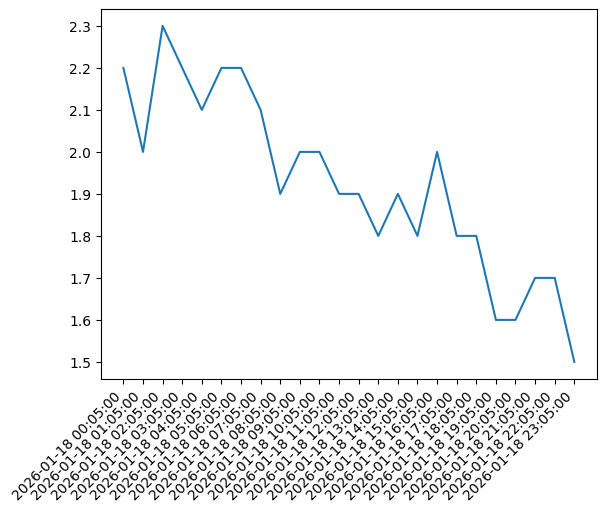

In [117]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Import matplotlib.dates

ax = plt.gca()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.plot(dic['time'],dic['SW_Height'])
#plt.plot(dic['SW_period'],dic['SW_direction'],'.')



4400137


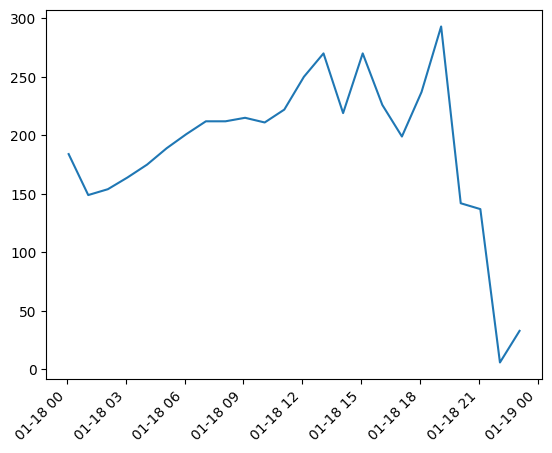

In [118]:
exple=ds_buoy.isel(buoy_id=0)
print(buoy_ids[1])

ax = plt.gca()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.plot(exple['time'],exple['Wind_direction']) # need correction?
#plt.plot(exple['time'],(360-exple['Wind_direction'])%360)


###compare with https://www.ndbc.noaa.gov/data/realtime2/44137.txt ???

In [119]:
#!!!!!!!!!!!!!!!!!!!!

#buyos recent data also exist at NOAA website
# eg george bank buoy  past 45 days data are here : https://www.ndbc.noaa.gov/data/realtime2/44011.txt
#nomenclature https://www.ndbc.noaa.gov/faq/measdes.shtml
#-> noaa buyo ; contain thehere Wdir is  Wind direction (the direction the wind is coming from in degrees clockwise from true N)

##0/ compare angle
### 1/ make a code later to upload an exemple with specific features
### 2/ list buoy in the area
### 3/ compare obs from moored buoy registred by ECCC with the same boyu in NOAA database.
### not important right now

In [120]:


                  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


                  #PART 2 GET regional model wave forecast



                  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [121]:
###see interactives map https://eccc-msc.github.io/msc-animet/?layers=HRDPS.CONTINENTAL_UU;0.75;0;1;0;1,HRDPS.CONTINENTAL_WD;0.75;0;1;0;1&extent=-10159787,2029488,-2552853,8092049&overlays=Boundaries&range=48,0,l,PT1H
###00 mean midnight but model give output every 6 hours
model_dir='https://dd.weather.gc.ca/'+day+'/WXO-DD/model_rdwps/national/2.5km/00/'


horizon=24# in hour (model)

grib2_dir = 'data_grib2'

#see variable description in the list at the bottom of
# https://eccc-msc.github.io/open-data/msc-data/nwp_rdwps/readme_rdwps-datamart_en/
var_ofinterest=['WVHGT','HTSGW','WVDIR','PPERWW','UGRD','VGRD']


#get all files in the targeted directory
def get_grib2_files(target_dir,var_ofinterest,horizon):
  response=requests.get(target_dir)
  soup=BeautifulSoup(response.text,'html.parser')
  #print(soup.prettify())

  # use find_all and a regex expression to find all .grib2 files
  txt=soup.find_all('a', href=re.compile(r'\.grib2$'))
  files=[]
  for row in txt:
    file=row['href']
    files.append(file)

  # remove file with forecast greater than horizon
  files0=files.copy() # need a copy to increment
  for file in files0:
    reach=file.split('_PT')[1][:3]
    if int(reach) > horizon:
      files.remove(file)

  ##keep only files with wanted variables
  grib2_list=[]
  for file in files:
    for var in var_ofinterest:
      if var in file:
        grib2_list.append(file)

  return grib2_list


grib2_files=get_grib2_files(model_dir,var_ofinterest,horizon)
grib2_files[:20]



['20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT000H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT001H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT002H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT003H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT004H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT005H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT006H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT007H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT008H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT009H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT010H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT011H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT012H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT013H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT014H.grib2',
 '20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatL

In [122]:
import urllib
#import xarray as xr
import os



# Create a directory to store the GRIB2 files if it doesn't exist
if not os.path.exists(grib2_dir):
  os.makedirs(grib2_dir)

# create subdir for a given day!
if not os.path.exists(os.path.join(grib2_dir,day)):
  os.makedirs(os.path.join(grib2_dir,day),exist_ok=True)


def download_grib2_files(grib2_files):
  for file in grib2_files:
    full_url = model_dir + file
    # Construct the full output path, including potential subdirectories based on the file name.
    output_path = os.path.join(grib2_dir, file[:8], file)


    if os.path.exists(output_path):
      print(f"{file} already exists. Skipping download.")
    else:
      print(f"Downloading: {full_url} to {output_path}")
      try:
        response = requests.get(full_url)
        response.raise_for_status() # Raise an HTTPError for bad responses
        with open(output_path, 'wb') as f:
          f.write(response.content)

      except requests.exceptions.HTTPError as err:
        print(f"HTTP error occurred for {file}: {err}")
      except requests.exceptions.RequestException as err:
        print(f"Other request error occurred for {file}: {err}")


download_grib2_files(grib2_files)

20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT000H.grib2 already exists. Skipping download.
20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT001H.grib2 already exists. Skipping download.
20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT002H.grib2 already exists. Skipping download.
20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT003H.grib2 already exists. Skipping download.
20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT004H.grib2 already exists. Skipping download.
20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT005H.grib2 already exists. Skipping download.
20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT006H.grib2 already exists. Skipping download.
20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT007H.grib2 already exists. Skipping download.
20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT008H.grib2 already exists. Skipping download.
20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT009H.grib2 already exists. Skipping download.
20260118T00Z_MSC_RDWPS_HTSGW_Sfc_RLatLon0.0225_PT0

In [123]:
import os
import importlib

# Install cfgrib for xarray to open GRIB2 files
try :
  importlib.import_module('cfgrib')
  print('cfgrib already installed')
except ImportError:
  print('installing cfgrib')
  !pip install cfgrib

# import xarray AFTER installing cfgrib to ensure cfgrib engine is ok
import xarray as xr


def remove_idxfiles():
#any grib2 load create an idx file, which need to be
#removed before listing existingfiles
  subdir= os.path.join(grib2_dir,day)
  for file in os.listdir(subdir):
    if file.endswith('.idx'):
      os.remove(os.path.join(subdir,file))




def load_grib(file):

# Construct the full path to the GRIB files
  day=file[:8]
  file_path = os.path.join(grib2_dir, day,file)

# Check if the file exists before attempting to open it
  if os.path.exists(file_path):
    # Open the dataset using xarray
    ds = xr.open_dataset(file_path, engine="cfgrib",
                         #filter_by_keys={'typeOfLevel': 'surface'}# U,V is at 10m!
    )
    #add a utc time zone, missing when loading
    #in those grib2 'time is time at which forecast is done
    #and valid time is time at which forecast is done + step
    #ds['time']=pd.to_datetime(ds['valid_time'].values).tz_localize('UTC')#
    # fail to give time(ns,utc)!
    # I have to convert stfrtime and add 'Z' for zulu and then convert back
    valid_time=pd.Series(ds['valid_time'].values).dt.strftime('%Y-%m-%d %H:%M:%SZ')
    ds['time']=pd.to_datetime(valid_time.values,format='ISO8601')#same format as buoy!

    #ds.set_coords('time')##,inplace=True)
    #ds=ds.expand_dims(dim='time' )
    #ts = ds['time'].dt.tz_localize(utc)#[0].item()

    # Ensure the timestamp is in UTC
    #if ts.tz is not None:
        #ts = ts.tz_convert('UTC')
    #print(ts)

    #remove not necessary coords
    ds=ds.drop_vars(['step','valid_time'])

    if'surface' in ds.coords:
      ds=ds.drop_vars('surface')
    if 'heightAboveGround' in ds.coords:
      ds=ds.drop_vars('heightAboveGround')
    # for now remove idxfile every time, could be when everything is loaded
    remove_idxfiles()

  else:
    print(f"Error: File not found at {file_path}")

  return ds




test_file=grib2_files[1]
#test_file.replace('HTSGW','UGRD')

#test a file with wind data
#https://eccc-msc.github.io/open-data/msc-data/nwp_rdwps/readme_rdwps-datamart_en/
#u and v components of the wind vector are to be resolved relative to the defined grid,
# in the direction of increasing i and j coordinates.

for file in grib2_files:
  if 'UGRD' in file:
    test_file=file
    break

print(test_file)
ds_u=load_grib(test_file)

test_file=test_file.replace('UGRD','VGRD')
ds_v=load_grib(test_file)


ds_u.u10.attrs

cfgrib already installed
20260118T00Z_MSC_RDWPS_UGRD_AGL-10m_RLatLon0.0225_PT000H.grib2


{'GRIB_paramId': 165,
 'GRIB_dataType': 'af',
 'GRIB_numberOfPoints': 3261296,
 'GRIB_typeOfLevel': 'heightAboveGround',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'rotated_ll',
 'GRIB_uvRelativeToGrid': 1,
 'GRIB_NV': 0,
 'GRIB_Nx': 2536,
 'GRIB_Ny': 1286,
 'GRIB_angleOfRotationInDegrees': 0.0,
 'GRIB_cfName': 'eastward_wind',
 'GRIB_cfVarName': 'u10',
 'GRIB_gridDefinitionDescription': 'Rotated latitude/longitude',
 'GRIB_iDirectionIncrementInDegrees': 0.0225,
 'GRIB_iScansNegatively': 0,
 'GRIB_jDirectionIncrementInDegrees': 0.0225,
 'GRIB_jPointsAreConsecutive': 0,
 'GRIB_jScansPositively': 1,
 'GRIB_latitudeOfFirstGridPointInDegrees': -12.2575,
 'GRIB_latitudeOfLastGridPointInDegrees': 16.655001,
 'GRIB_latitudeOfSouthernPoleInDegrees': -36.08852,
 'GRIB_longitudeOfFirstGridPointInDegrees': 345.22329,
 'GRIB_longitudeOfLastGridPointInDegrees': 42.260796,
 'GRIB_longitudeOfSouthernPoleInDegrees': 245.305142,
 'GRIB_missingValue': 3.4028234663852886e+38,
 '

Text(0.5, 1.0, 'latitude')

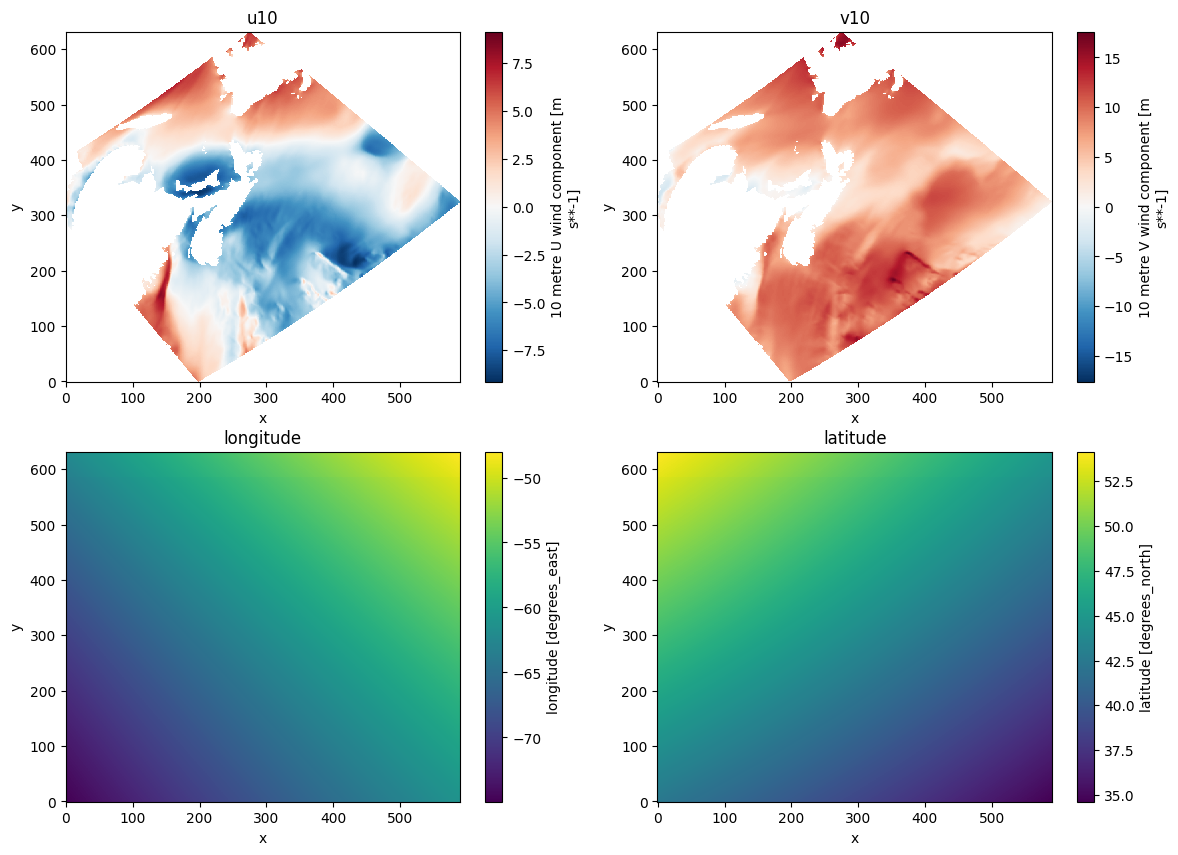

In [124]:
#import matplotlib.pyplot as plt
del ds
ds=xr.merge([ds_u.squeeze('time'),ds_v.squeeze('time')],join='inner',compat='no_conflicts' )
ds['Wind_amp']=np.sqrt(ds['u10']**2+ds['v10']**2)

# I just want a small area to check  u,v
bbox={
    'min_lat':40,
    'max_lat':50,
    'min_lon':-70,
    'max_lon':-55,
}


ds = ds.where(
      (ds.latitude >= bbox['min_lat']) &
      (ds.latitude <= bbox['max_lat']) &
      (ds.longitude >= bbox['min_lon']) &
      (ds.longitude <= bbox['max_lon']),
      ).dropna('x', how='all')\
      .dropna('y', how='all') #drop x y where all lign/row is nan


#ds['Wind_amp'].plot()
fig,ax=plt.subplots(2,2,figsize=(14,10))
ds['u10'].plot(ax=ax[0,0],)
ds['v10'].plot(ax=ax[0,1])
ds['longitude'].plot(ax=ax[1,0])
ds['latitude'].plot(ax=ax[1,1])
ax[0,0].set_title('u10')
ax[0,1].set_title('v10')
ax[1,0].set_title('longitude')
ax[1,1].set_title('latitude')
#
# ds.plot.quiver(x='longitude',y='latitude',u='u10',v='v10',
#                aspect='equal',size=10,
#                )

-49.07507181585581 -31.193661322312664 -40.25870287042398


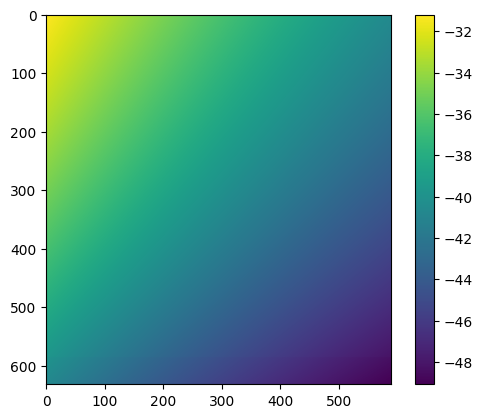

In [125]:

#########FROM ABOVE figure, axis are clearly rotated. No rotation would mean longitude is aligned with x, and latitude would be aligned with y
######### ALSO, one can see that rotation angle is about 40-45 degree,
## here I made a code to better compute this angle, but I am not sure 100%

def compute_curvilign_angle(ds):
  '''
  find local angle of rotation
  see definitions on wiki https://en.wikipedia.org/wiki/Curvilinear_coordinates
  and https://gis.stackexchange.com/questions/10808/manually-transforming-rotated-lat-lon-to-regular-lat-lon/14445#14445
  #not sure at 100%
  '''

  #(xprime,prime) is the 'destination' grid (true North, true East)
  yprime  = ds.latitude.values
  xprime  = ds.longitude.values

  yprime=np.deg2rad(yprime)
  xprime=np.deg2rad(xprime)


  #find local (xprim,yprime) increasing direction ;  central differences
  dy_y = yprime[:, 2:] - yprime[:, :-2]
  dx_y = xprime[:, 2:] - xprime[:, :-2]


  y_c  = yprime[:, 1:-1]  # center latitude
  #print(y_c)
  #print(np.mean(y_c), np.std(y_c)) #slights change over the domain

  # east/north components of y-direction
  dyE = dx_y * np.cos(y_c)
  dyN = dy_y


  # By definition :
  # cos theta= x/xprime
  # sin theta= y /yprime
  # so, theta= arctan(...)
  theta = np.arctan2(dyN, dyE)  # angle between grid x and xprime (true North)
  #atan2(y,x)
  #
  theta=np.rad2deg(theta)

  return theta

theta=compute_curvilign_angle(ds)


print(theta.min(),theta.max(), theta.mean())

ax=plt.imshow(theta)
plt.colorbar(ax)
plt.show()

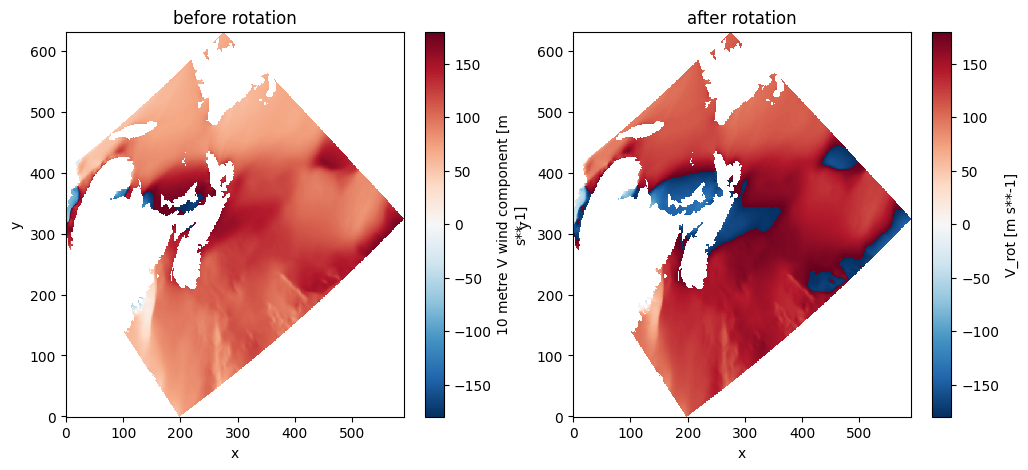

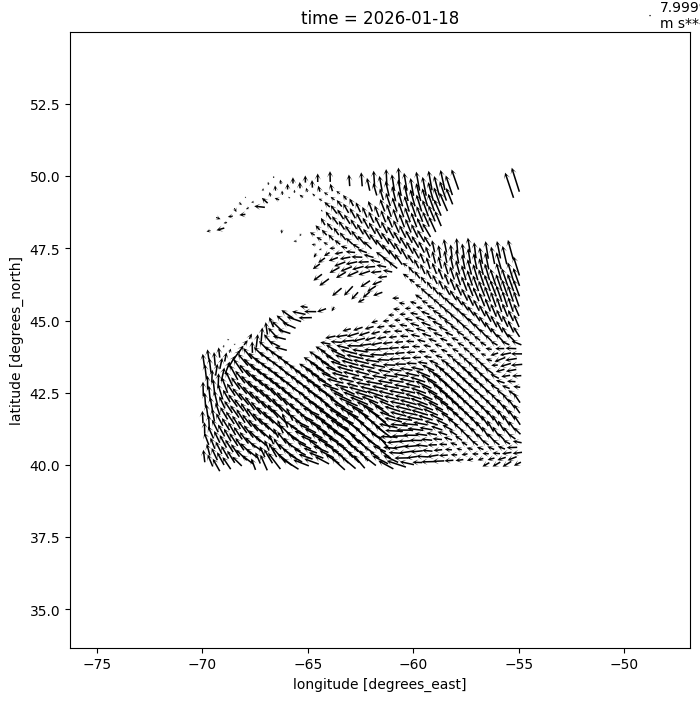

In [126]:
#########Rotation!

def speed_rotation(ds,angle):
  #let say 'local' angle rotation is 30 degrees
  rot=np.deg2rad(angle)
  Ugrid=ds['u10']
  Vgrid=ds['v10']

  #see rotation matrix https://en.wikipedia.org/wiki/Rotation_matrix#In_two_dimensions
  Uearth = np.cos(rot)*Ugrid - np.sin(rot)*Vgrid
  Vearth = np.sin(rot)*Ugrid + np.cos(rot)*Vgrid
  ds['U_rot']=Uearth
  ds['V_rot']=Vearth
  return ds

#ds['Wind_amp']=np.sqrt(ds['U']**2+ds['V']**2)
ds=speed_rotation(ds,40)

fig,ax=plt.subplots(1,2,figsize=(12,5))
np.rad2deg(np.arctan2(ds['v10'],ds['u10'])).plot(ax=ax[0])
np.rad2deg(np.arctan2(ds['V_rot'],ds['U_rot'])).plot(ax=ax[1])
ax[0].set_title('before rotation')
ax[1].set_title('after rotation')

###those angle are in math convention! (counterclockwise+ 0at east) + this is where the wind go
# buoy normally give incoming direction in geographical convention!
step=12
ds.isel(x=slice(None,None,step), y=slice(None,None,step))\
  .plot.quiver(x='longitude',y='latitude',
               #u='u10',v='v10',
               u='U_rot',v='V_rot',
               aspect='equal',size=8,
               width=0.0025 ,headaxislength=2,headlength=4,headwidth=4,
                scale=200*2,
               )


  #!!!compare quiver with
  #https://eccc-msc.github.io/msc-animet/?layers=HRDPS.CONTINENTAL_UU;0.75;0;1;0;1,HRDPS.CONTINENTAL_WD;0.75;0;1;0;1&extent=-10159787,2029488,-2552853,8092049&overlays=Boundaries&range=48,0,l,PT1H

In [127]:
!pip install cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

print('Install cartopy for prettier projection')

Install cartopy for prettier projection


In [128]:
ds['time']

<xarray.DataArray 'time' ()> Size: 8B
array('2026-01-18T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2026-01-18

u10


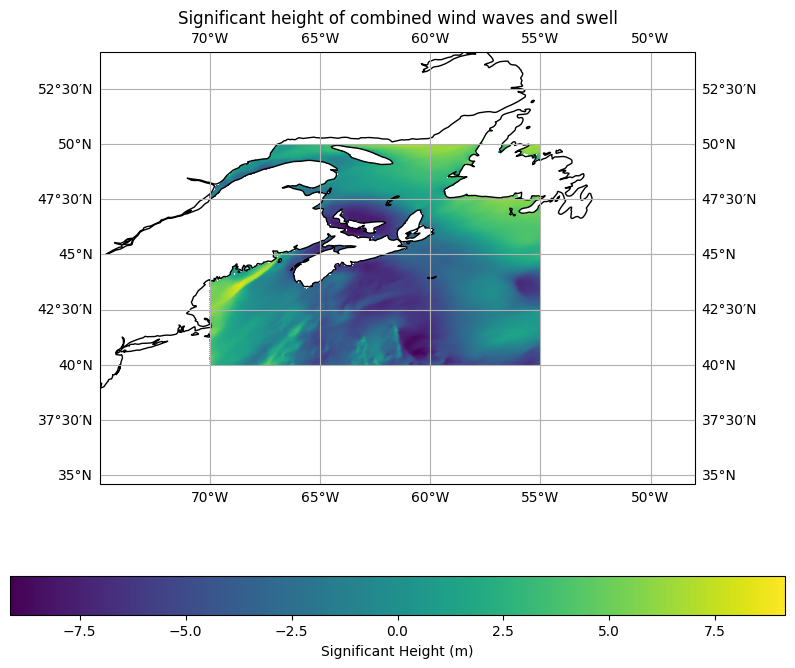

In [129]:

# Get the key variable
key=list(ds.keys())[0]
print(key)

###create a dictionnary here to create (key : variable meaning ) relation


# Create a figure and an axes object with a PlateCarree projection
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
# xarray's plot method integrates well with cartopy for geographical plotting
ds[key].plot(ax=ax,
                transform=ccrs.PlateCarree(),
                x='longitude',
                y='latitude',
                cmap='viridis',
                cbar_kwargs={'label': 'Significant Height (m)',
                             'orientation' : 'horizontal'})

# Add map features
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set title
plt.title('Significant height of combined wind waves and swell')
plt.show()



In [130]:
####create

var_name='HTSGW' #this is var name of previous example


def get_grib2_specificdata(day,var_name,bbox=None):

  files_saved=os.listdir(grib2_dir+'/'+day+'/')
  files_saved.sort()

  ds_var=[]
  for file in files_saved:
    if var_name in file:
      ds=load_grib(file)
      #print(f'download {file}')
      ds_var.append(ds)

  ds=xr.concat(ds_var, dim='time',
               #combine='nested'
               coords='different',compat='equals',
               data_vars='all'
               )
  #ds=xr.combine_by_coords(ds_var)
  #ds=xr.combine_nested(ds_var,concat_dim='time')

  #crop here as I will use this function a lot
  if bbox is not None:
    ds = ds.where(
          (ds.latitude >= bbox['min_lat']) &
          (ds.latitude <= bbox['max_lat']) &
          (ds.longitude >= bbox['min_lon']) &
          (ds.longitude <= bbox['max_lon']),
          ).dropna('x', how='all')\
          .dropna('y', how='all') #drop x y where all lign/row is nan

  return ds


bbox={
    'min_lat':35,
    'max_lat':50,
    'min_lon':-75,
    'max_lon':-40,
}

# DS_cropped = DS.where(
#     (DS.latitude >= min_lat) & (DS.latitude <= max_lat) &
#     (DS.longitude >= min_lon) & (DS.longitude <= max_lon),
#     drop=True
# ).dropna('x', how='all').dropna('y', how='all') # Drop rows/columns that are all NaN after filtering


ds=get_grib2_specificdata(day,var_name,bbox)
ds
#ds['time']

<xarray.Dataset> Size: 86MB
Dimensions:    (time: 25, y: 1179, x: 626)
Coordinates:
  * time       (time) datetime64[ns, UTC] 200B 2026-01-18 00:00:00+00:00 ... ...
    latitude   (y, x) float64 6MB 36.94 36.93 36.92 36.91 ... 47.92 47.9 47.89
    longitude  (y, x) float64 6MB -79.07 -79.05 -79.02 ... -40.84 -40.82 -40.8
Dimensions without coordinates: y, x
Data variables:
    swh        (time, y, x) float32 74MB nan nan nan nan ... 6.465 6.467 6.469
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    history:                 2026-01-19T13:41 GRIB to CDM+CF via cfgrib-0.9.1...

In [131]:
def get_grib2_alldata(day,bbox=None):

  files_saved=os.listdir(grib2_dir+'/'+day+'/')
  files_saved.sort()

  x=[fil.split('_')[3] for fil in files_saved]
  var_available=list(set(x))

  Allds=[]
  for var in var_available:
    print(f'getting {var}')
    X=get_grib2_specificdata(day,var,bbox)
    Allds.append(X)

  ### concat in time only!!! as concat create a new dimension
  ### here use merge function
  Allds=xr.merge(Allds,join='inner',compat='no_conflicts' )
  return Allds

DS=get_grib2_alldata(day,bbox)
DS

#DS.step/60/60/1e9# step is in nanoseconds ; division give it in hour

##pp1d, see https://codes.ecmwf.int/grib/param-db/140231

getting UGRD
getting WVHGT
getting WVDIR
getting PPERWW
getting HTSGW
getting VGRD


<xarray.Dataset> Size: 455MB
Dimensions:    (time: 25, y: 1179, x: 626)
Coordinates:
  * time       (time) datetime64[ns, UTC] 200B 2026-01-18 00:00:00+00:00 ... ...
    latitude   (y, x) float64 6MB 36.94 36.93 36.92 36.91 ... 47.92 47.9 47.89
    longitude  (y, x) float64 6MB -79.07 -79.05 -79.02 ... -40.84 -40.82 -40.8
Dimensions without coordinates: y, x
Data variables:
    u10        (time, y, x) float32 74MB nan nan nan nan ... 7.893 7.9 7.906
    shww       (time, y, x) float32 74MB nan nan nan nan ... 5.372 5.375 5.379
    wvdir      (time, y, x) float32 74MB nan nan nan nan ... 250.7 250.8 250.9
    pp1dw      (time, y, x) float32 74MB nan nan nan nan ... 11.11 11.13 11.15
    swh        (time, y, x) float32 74MB nan nan nan nan ... 6.465 6.467 6.469
    v10        (time, y, x) float32 74MB nan nan nan nan ... 12.74 12.91 13.09
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    history:                 2026-01-19T13:42 GRIB to CDM+CF via cfgrib-0.9.1...

In [132]:
#DS.keys()
#data existing for buoy           model                               model
              # 'SW_Height',      WVHGT                              shww https://codes.ecmwf.int/grib/param-db/140234
              # 'SW_period',      PPERWW                             pp1dw https://codes.ecmwf.int/grib/param-db/140231
              # 'SW_direction',   WVDIR                              wvdir https://codes.ecmwf.int/grib/param-db/260232
              # 'Wind_speed',     u,v cartesian
              # 'Wind_dir'        u,v cartesian
              #   None            HTSGW (total heigh wind+swell)     swh https://codes.ecmwf.int/grib/param-db/140229


### correct wind because of coord rotation to real North

theta=compute_curvilign_angle(DS)


DS=speed_rotation(DS,np.mean(theta)) # supposing 40 as rotation angle

grib2_rename_dic={
                'shww':'SW_Height',
                'pp1dw':'SW_period',
                'wvdir':'SW_direction',
                'U_rot':'Wind_U',
                'V_rot':'Wind_V',
                'swh':'Total_Height'
}

DS=DS.rename_vars(grib2_rename_dic)
DS
#convert (u,v) in (amp,dir) or do the opposite?



<xarray.Dataset> Size: 750MB
Dimensions:       (time: 25, y: 1179, x: 626)
Coordinates:
  * time          (time) datetime64[ns, UTC] 200B 2026-01-18 00:00:00+00:00 ....
    latitude      (y, x) float64 6MB 36.94 36.93 36.92 ... 47.92 47.9 47.89
    longitude     (y, x) float64 6MB -79.07 -79.05 -79.02 ... -40.82 -40.8
Dimensions without coordinates: y, x
Data variables:
    u10           (time, y, x) float32 74MB nan nan nan nan ... 7.893 7.9 7.906
    SW_Height     (time, y, x) float32 74MB nan nan nan ... 5.372 5.375 5.379
    SW_direction  (time, y, x) float32 74MB nan nan nan ... 250.7 250.8 250.9
    SW_period     (time, y, x) float32 74MB nan nan nan ... 11.11 11.13 11.15
    Total_Height  (time, y, x) float32 74MB nan nan nan ... 6.465 6.467 6.469
    v10           (time, y, x) float32 74MB nan nan nan ... 12.74 12.91 13.09
    Wind_U        (time, y, x) float64 148MB nan nan nan ... 14.3 14.42 14.54
    Wind_V        (time, y, x) float64 148MB nan nan nan ... 4.466 4.593 4.72
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    history:                 2026-01-19T13:42 GRIB to CDM+CF via cfgrib-0.9.1...

In [133]:
import numpy as np

# create 2 function to convert angle from math convention to geographical convention
# and reverse operation

def geo2math(angle_deg):
  '''angle in degreees,
  convert from geographic to mathematical angle
  '''
  return (90-angle_deg)%360


def math2geo(angle_deg):
  '''angle in degreees,
  convert from  mathematical to geographic angle
  '''
  return (90-angle_deg)%360




u=DS['Wind_U']
v=DS['Wind_V']

ampl=np.sqrt(u**2+v**2)
angle_rad=np.arctan2(v, u)#+np.pi
angle_deg=np.rad2deg(angle_rad)
angle_truenorth=math2geo(angle_deg)

DS['Wind_speed']=ampl
DS['Wind_direction']=angle_truenorth #this is in geographical convention 0=North, counting clockwise
DS

<xarray.Dataset> Size: 1GB
Dimensions:         (time: 25, y: 1179, x: 626)
Coordinates:
  * time            (time) datetime64[ns, UTC] 200B 2026-01-18 00:00:00+00:00...
    latitude        (y, x) float64 6MB 36.94 36.93 36.92 ... 47.92 47.9 47.89
    longitude       (y, x) float64 6MB -79.07 -79.05 -79.02 ... -40.82 -40.8
Dimensions without coordinates: y, x
Data variables:
    u10             (time, y, x) float32 74MB nan nan nan ... 7.893 7.9 7.906
    SW_Height       (time, y, x) float32 74MB nan nan nan ... 5.372 5.375 5.379
    SW_direction    (time, y, x) float32 74MB nan nan nan ... 250.7 250.8 250.9
    SW_period       (time, y, x) float32 74MB nan nan nan ... 11.11 11.13 11.15
    Total_Height    (time, y, x) float32 74MB nan nan nan ... 6.465 6.467 6.469
    v10             (time, y, x) float32 74MB nan nan nan ... 12.74 12.91 13.09
    Wind_U          (time, y, x) float64 148MB nan nan nan ... 14.3 14.42 14.54
    Wind_V          (time, y, x) float64 148MB nan nan nan ... 4.466 4.593 4.72
    Wind_speed      (time, y, x) float64 148MB nan nan nan ... 14.99 15.14 15.29
    Wind_direction  (time, y, x) float64 148MB nan nan nan ... 72.66 72.34 72.02
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    history:                 2026-01-19T13:42 GRIB to CDM+CF via cfgrib-0.9.1...

In [134]:
#convert amplitude, direction to u,v (polar to cartesian)
ampl=DS['Wind_speed']
angle_deg=DS['Wind_direction']
angle_truemath=geo2math(angle_deg)
angle_rad=np.deg2rad(angle_deg)#+np.pi

u=ampl*np.cos(angle_rad)
v=ampl*np.sin(angle_rad)


##check if reprojection formula give good speed in cartesion
error=np.abs(DS['Wind_U']-u + (DS['Wind_V']-v) )

print(f'wind speed minvalue is {ampl.min().values}')
print(f'max reprojection error is {error.max().values}')

####ok! nice :)

wind speed minvalue is 0.001853456517848462
max reprojection error is 2.4868995751603507e-14


['u10', 'SW_Height', 'SW_direction', 'SW_period', 'Total_Height', 'v10', 'Wind_U', 'Wind_V', 'Wind_speed', 'Wind_direction']


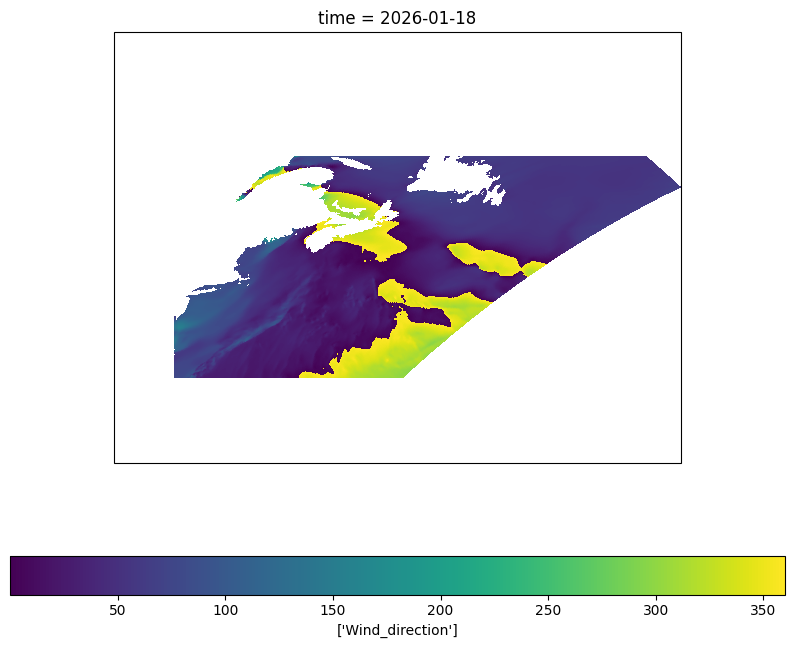

In [135]:


key=list(DS.keys())#[0]
print(key)


# 2Dmap at given time
ds_2d=DS.isel(time=0)

# Create a figure and an axes object with a PlateCarree projection
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())


ds_2d[key[-1]].plot( ax=ax,
            transform=ccrs.PlateCarree(),
            x='longitude',
            y='latitude',
            cmap='viridis',
            cbar_kwargs={'label': [key[-1]],
                          'orientation' : 'horizontal'})

In [136]:

          # compare model and observations



In [137]:
stations

,#IATA,FR name,EN name,Province,AUTO/MAN,Latitude,Longitude,Elevation,# ICAO,# WMO,# MSC,DST Time,STD Time,Data Provider,Data Attribution Notice
25,,BANQUEREAU BANK,BANQUEREAU BANK,XX,AUTO,44.2402,-57.1032,0,,4400139,9300243,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
27,,EAST SCOTIA SLOPE,EAST SCOTIA SLOPE,XX,AUTO,42.2613,-61.9985,0,,4400137,9300355,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
28,,HALIFAX HARBOUR,HALIFAX HARBOUR,XX,AUTO,44.5017,-63.4026,0,,4400258,9300400,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.
29,,LA HAVE BANK,LA HAVE BANK,XX,AUTO,42.5047,-64.0718,0,,4400150,9300450,,,Environment and Climate Change Canada (ECCC) i...,Data provided by ECCC. All rights reserved.


In [138]:
buoy_id = int(buoy_ids[0])

buoy_info = stations[stations['# WMO'] == str(buoy_id)]
buoy_lat = buoy_info['Latitude'].iloc[0]
buoy_lon = buoy_info['Longitude'].iloc[0]

print(f"Selected buoy ID: {buoy_id}")
print(f"Latitude is: {buoy_lat}")
print(f"Longitude is : {buoy_lon}")


Selected buoy ID: 4400139
Latitude is: 44.2402
Longitude is : -57.1032


In [139]:
ds_buoy.sel(buoy_id=buoy_id)

<xarray.Dataset> Size: 1kB
Dimensions:         (time: 24)
Coordinates:
  * time            (time) datetime64[ns, UTC] 192B 2026-01-18 00:05:00+00:00...
    buoy_id         int64 8B 4400139
    lat             float64 8B 44.24
    lon             float64 8B -57.1
Data variables:
    SW_Height       (time) float64 192B 3.8 4.0 3.6 3.8 4.1 ... 2.6 2.5 2.5 2.5
    SW_period       (time) float64 192B 10.0 10.6 10.3 10.5 ... 8.6 8.1 8.4 8.5
    SW_direction    (time) int64 192B 240 238 240 239 244 ... 231 230 229 237
    Wind_speed      (time) float64 192B 4.889 4.194 5.806 ... 1.694 1.389 2.194
    Wind_direction  (time) int64 192B 184 149 154 164 175 ... 293 142 137 6 33

In [140]:
#import numpy as np # Import numpy for numerical operations

def nearest_index(ds,location):
    #
    #see maps here https://eccc-msc.github.io/msc-animet/
    #see https://stackoverflow.com/questions/58758480/xarray-select-nearest-lat-lon-with-multi-dimension-coordinates
    idx=[]
    idy=[]
    for loca in location:
        lat,lon=loca
        d_lat = ds.latitude - lat
        d_lon = ds.longitude - lon
        r2 = d_lat**2 + d_lon**2
        i_j_loc = np.where(r2 == np.min(r2))
        idx.append(i_j_loc[1])
        idy.append(i_j_loc[0])
    #
    #put in the right format: a list of number
    idx=np.array(idx).flatten().tolist()
    idy=np.array(idy).flatten().tolist()
    return (idy,idx)

#iy,ix=nearest_index(DS_cropped,[[buoy_lat,buoy_lon]])
iy,ix=nearest_index(DS,stations[['Latitude','Longitude']].values)
#print(iy,ix)

# Interpolate and assign 'buoy_id' as the new dimension
ds_extract = DS.interp(y=('buoy_id', iy), x=('buoy_id', ix))
ds_extract.coords['buoy_id'] = stations['# WMO'].values.astype(int)
#ds_extract.drop_vars(['latitude','longitude'])
#ds_extract

ds_extract.sel(buoy_id=buoy_id)


<xarray.Dataset> Size: 2kB
Dimensions:         (time: 25)
Coordinates:
  * time            (time) datetime64[ns, UTC] 200B 2026-01-18 00:00:00+00:00...
    latitude        float64 8B 44.23
    longitude       float64 8B -57.11
    buoy_id         int64 8B 4400139
Data variables:
    u10             (time) float64 200B -1.327 -2.477 -3.659 ... 1.685 0.3624
    SW_Height       (time) float64 200B nan nan nan nan ... nan nan nan nan
    SW_direction    (time) float64 200B nan nan nan nan ... nan nan nan nan
    SW_period       (time) float64 200B nan nan nan nan ... nan nan nan nan
    Total_Height    (time) float64 200B 3.485 3.342 3.211 ... 2.512 2.438 2.359
    v10             (time) float64 200B 4.717 3.972 3.673 ... -2.769 -3.954
    Wind_U          (time) float64 200B 2.084 0.727 -0.3622 ... -0.5385 -2.314
    Wind_V          (time) float64 200B 4.435 4.624 5.172 ... -3.197 -3.227
    Wind_speed      (time) float64 200B 4.9 4.681 5.185 ... 1.146 3.242 3.971
    Wind_direction  (time) float64 200B 25.17 8.935 356.0 ... 189.9 189.6 215.6
    y               int64 8B 694
    x               int64 8B 411
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    history:                 2026-01-19T13:42 GRIB to CDM+CF via cfgrib-0.9.1...

4400139
SW_Height
SW_period
SW_direction
Wind_speed
Wind_direction


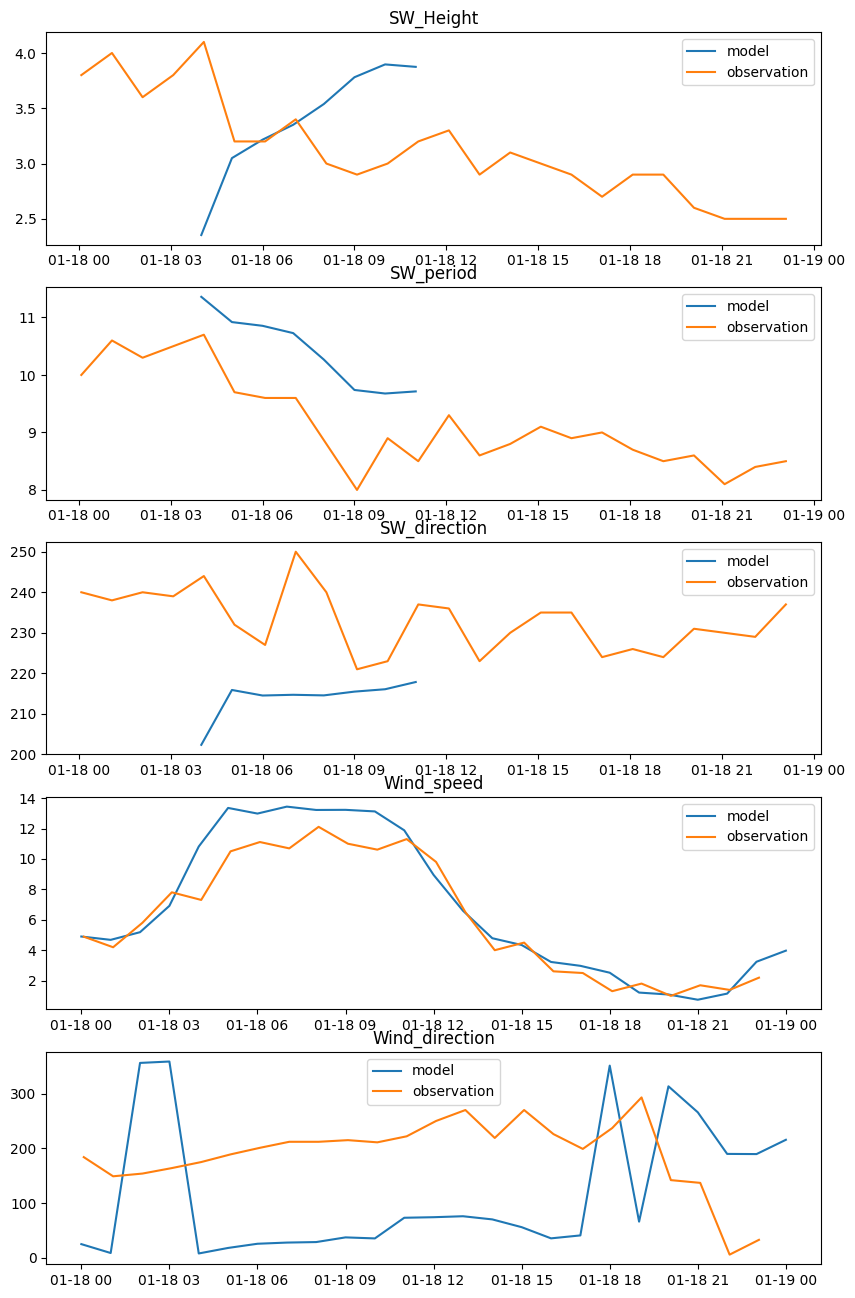

In [153]:
buoy_id=int(buoy_ids[0])
print(buoy_id)


fig, ax = plt.subplots(5, 1, figsize=(10, 16))

i=0
for key in list(ds_buoy.keys()):
  print(key)
  ax[i].plot(ds_extract['time'],ds_extract.sel(buoy_id=buoy_id)[key],label='model')
  ax[i].plot(ds_buoy['time'],ds_buoy.sel(buoy_id=buoy_id)[key],label='observation')
  ax[i].set_title(key)
  ax[i].legend()
  i=i+1






4400139


array([  21.16992438, -320.06489543,   21.99349277,   14.55245524,
       -346.88986878,    9.20129039,    4.83526566,   -4.00432058,
         -3.07742996,    2.46905779])

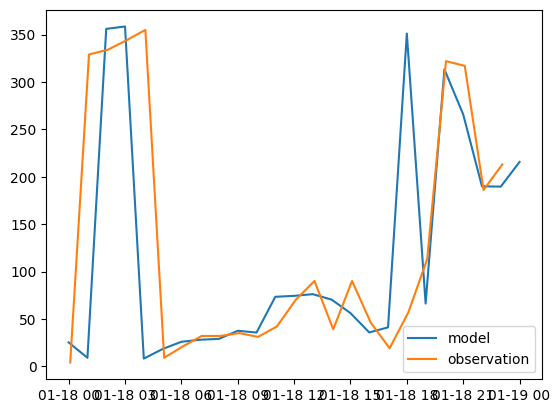

In [154]:
#https://www.ndbc.noaa.gov/faq/measdes.shtml#stdmet
#for buoy Wind direction is direction 'coming from' in degrees clockwise from true N
#issue with wind direction
# for model, wind direction is where the wind goes!!!!!! opposite direction of 'coming from' direction

print(buoy_id)

ww=ds_buoy.sel(buoy_id=buoy_id)[key]
ww=(180+ ww)%360

key='Wind_direction'
fig,ax=plt.subplots()
ax.plot(ds_extract['time'],ds_extract.sel(buoy_id=buoy_id)[key],label='model')
ax.plot(ds_buoy['time'],ww,label='observation')
ax.legend()



ds_extract.sel(buoy_id=buoy_id)[key].values[:10]-ww.values[:10]

In [143]:
try:
    import filterpy
    print("filterpy is already installed.")
except ImportError:
    print("Installing filterpy...")
    !pip install filterpy
    print("filterpy installed.")

import numpy as np
from filterpy.kalman import KalmanFilter

buoy_id = int(buoy_ids[0])
observed_data = ds_buoy.sel(buoy_id=buoy_id)
forecast_data = ds_extract.sel(buoy_id=buoy_id)

print(f"Selected Buoy ID: {buoy_id}")
print('\n\n')

print("Observed Data for Selected Buoy:")
print(observed_data)

print('\n\n')

print("\nForecast Data for Selected Buoy:")
print(forecast_data)

filterpy is already installed.
Selected Buoy ID: 4400139



Observed Data for Selected Buoy:
<xarray.Dataset> Size: 1kB
Dimensions:         (time: 24)
Coordinates:
  * time            (time) datetime64[ns, UTC] 192B 2026-01-18 00:05:00+00:00...
    buoy_id         int64 8B 4400139
    lat             float64 8B 44.24
    lon             float64 8B -57.1
Data variables:
    SW_Height       (time) float64 192B 3.8 4.0 3.6 3.8 4.1 ... 2.6 2.5 2.5 2.5
    SW_period       (time) float64 192B 10.0 10.6 10.3 10.5 ... 8.6 8.1 8.4 8.5
    SW_direction    (time) int64 192B 240 238 240 239 244 ... 231 230 229 237
    Wind_speed      (time) float64 192B 4.889 4.194 5.806 ... 1.694 1.389 2.194
    Wind_direction  (time) int64 192B 184 149 154 164 175 ... 293 142 137 6 33




Forecast Data for Selected Buoy:
<xarray.Dataset> Size: 2kB
Dimensions:         (time: 25)
Coordinates:
  * time            (time) datetime64[ns, UTC] 200B 2026-01-18 00:00:00+00:00...
    latitude        float64 8B 44.23
    l

In [144]:
forecast_data['time'].isel(time=i).values # this is a datetime
#forecast_data['time'].values[i] # this is nanoseconds

np.datetime64('2026-01-18T05:00:00.000000000')

In [191]:
#####Kalman filtering test with one dimension


buoy_id = int(buoy_ids[0])

observed_data = ds_buoy.sel(buoy_id=buoy_id)
forecast_data = ds_extract.sel(buoy_id=buoy_id)


key='Wind_speed' #i.e. features
observations = observed_data[key].values
forecasts = forecast_data[key].values

#initiation
x_0 = forecasts[0]#initial state estimate
P_0 = 0.1 #initial state covariance
F = 1 #state transition model
H = 1 #observation model
Q = np.nanvar(np.diff(forecasts)) #process noise covariance


# forecast is defined by horizon whereas obs is on 24h, and they began at the same time
min_len = min(len(observations), len(forecasts))
R = np.nanvar(observations[:min_len] - forecasts[:min_len]) #measurement noise covariance

print(f"Initial State Estimate (x_0): {x_0}")
print(f"Initial State Covariance (P_0): {P_0}")
print(f"State Transition Model (F): {F}")
print(f"Observation Model (H): {H}")
print(f"Process Noise Covariance (Q): {Q}")
print(f"Measurement Noise Covariance (R): {R}")


# Instantiate a KalmanFilter object
kf = KalmanFilter(dim_x=1, dim_z=1) # dim_x is the dimension of the state, dim_z is the dimension of the measurement

# Initialize Kalman filter
kf.x = np.array([x_0])  # Initial state estimate
kf.P = np.array([[P_0]]) # Initial state covariance
kf.F = np.array([[F]])  # State transition matrix
kf.H = np.array([[H]])  # Measurement function
kf.Q = np.array([[Q]])  # Process noise covariance
kf.R = np.array([[R]])  # Measurement noise covariance

# 3. Create an empty list to store the Kalman-filtered estimates
filtered_states = []



Initial State Estimate (x_0): 4.899729688473018
Initial State Covariance (P_0): 0.1
State Transition Model (F): 1
Observation Model (H): 1
Process Noise Covariance (Q): 2.20425850656699
Measurement Noise Covariance (R): 1.5943982021302547


0


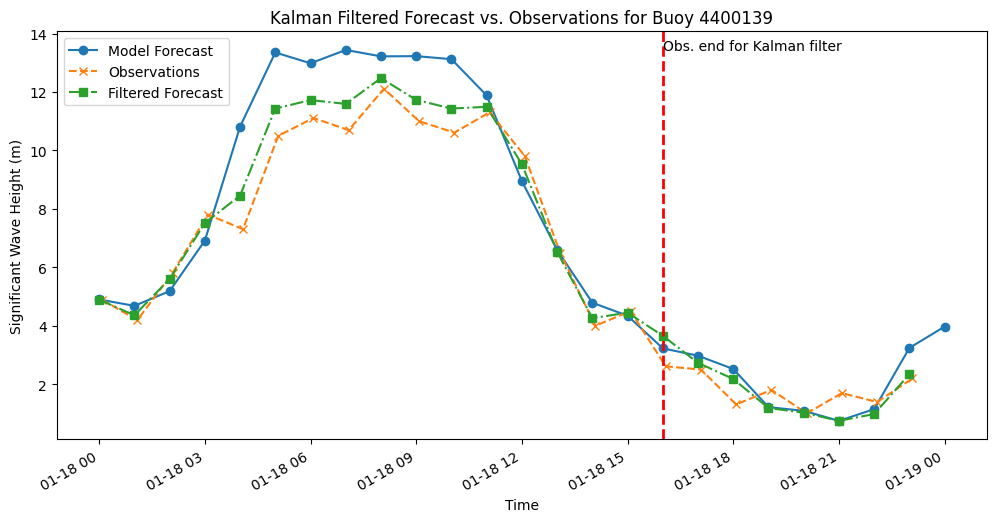

In [192]:


kf_states = []
kf_times = []

num_steps=24
end_step=16 #end of observations ;

for i in range(num_steps):
    # Kalman filter prediction based on previous state
    kf.predict()

    # Update the predicted state (kf.x) to be the current forecast
    kf.x = np.array([forecasts[i]])

    # Kalman Filter update using the observation
    if i < end_step:#len(observations):
      obs_actual = observations[i]
      kf.update(np.array([obs_actual]))# update only if obs
    else:
      kf.update(np.array(np.nanmean([[obs_actual *1/(1+i-end_step) ],  kf.x]) )) # here I update mix last obs+forecast
      #if no obs, I update a mean...not optimal! weigth 1/(1+i-end_step) decrease last obs weights as time increase

    kf_states.append(kf.x[0])
    kf_times.append(forecast_data['time'].isel(time=i).values)



#kf_states = np.array(filtered_states)
print(len(filtered_states))

# --- Visualize Extended Forecast ---
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Model Forecast (full extended length)
ax.plot(forecast_data['time'], forecasts, label='Model Forecast', marker='o', linestyle='-')

# Plot Observations (up to available length)
ax.plot(observed_data['time'], observations, label='Observations', marker='x', linestyle='--')

# Plot Kalman Filtered Forecast (full extended length)
ax.plot(kf_times, kf_states, label='Filtered Forecast', marker='s', linestyle='-.')

# Plot vertical line showing end of observations considered in Kalman filtering
plt.axvline(x=kf_times[end_step], color='r', linestyle='--', linewidth=2)
ax.text(kf_times[end_step],np.max(forecasts),'Obs. end for Kalman filter')

ax.set_title(f'Kalman Filtered Forecast vs. Observations for Buoy {buoy_id}')
ax.set_xlabel('Time')
ax.set_ylabel('Significant Wave Height (m)')
ax.legend(loc='upper left')


# Auto-format x-axis dates to prevent overlap
fig.autofmt_xdate()


